# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.3 MB/s eta 0:00:00 0:00:01


In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [33]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [34]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [5]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [7]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [8]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:



In [30]:
#Nhập mã lập trình của bạn tại đây:
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(confirmed[date].sum() - deaths[date].sum() - recoveries[date].sum())

# calculate the rate
mortality_rate = [d / c if c != 0 else 0 for d, c in zip(total_deaths, total_cases)]
recovery_rate = [r / c if c != 0 else 0 for r, c in zip(total_recovered, total_cases)]

In [10]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


In [ ]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

In [13]:
#Nhập mã lập trình của bạn tại đây:
#create list date
adjusted_dates = list(range(len(dates)))
#calculate log(10) of total 
log_total_cases = np.log10(total_cases)
log_total_deaths = np.log10(total_deaths)
log_total_recovered = np.log10(total_recovered)
log_total_active = np.log10(total_active)

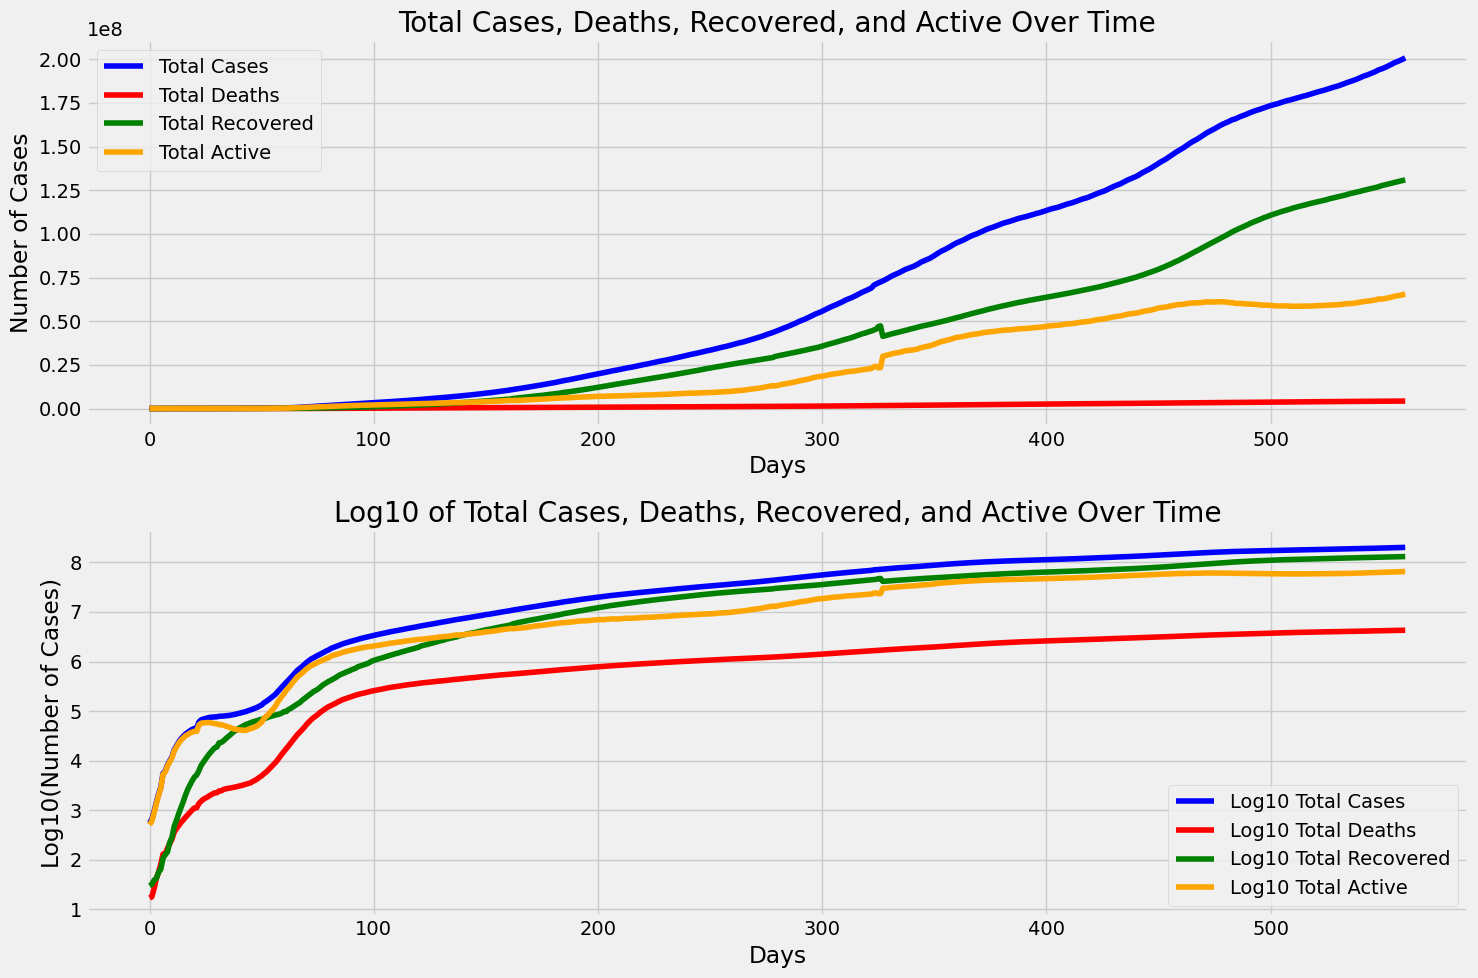

In [14]:
#create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# plot 1
ax1.plot(adjusted_dates, total_cases, label='Total Cases', color='blue')
ax1.plot(adjusted_dates, total_deaths, label='Total Deaths', color='red')
ax1.plot(adjusted_dates, total_recovered, label='Total Recovered', color='green')
ax1.plot(adjusted_dates, total_active, label='Total Active', color='orange')
ax1.set_title('Total Cases, Deaths, Recovered, and Active Over Time')
ax1.set_xlabel('Days')
ax1.set_ylabel('Number of Cases')
ax1.legend()
ax1.grid(True)

# plot2
ax2.plot(adjusted_dates, log_total_cases, label='Log10 Total Cases', color='blue')
ax2.plot(adjusted_dates, log_total_deaths, label='Log10 Total Deaths', color='red')
ax2.plot(adjusted_dates, log_total_recovered, label='Log10 Total Recovered', color='green')
ax2.plot(adjusted_dates, log_total_active, label='Log10 Total Active', color='orange')
ax2.set_title('Log10 of Total Cases, Deaths, Recovered, and Active Over Time')
ax2.set_xlabel('Days')
ax2.set_ylabel('Log10(Number of Cases)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

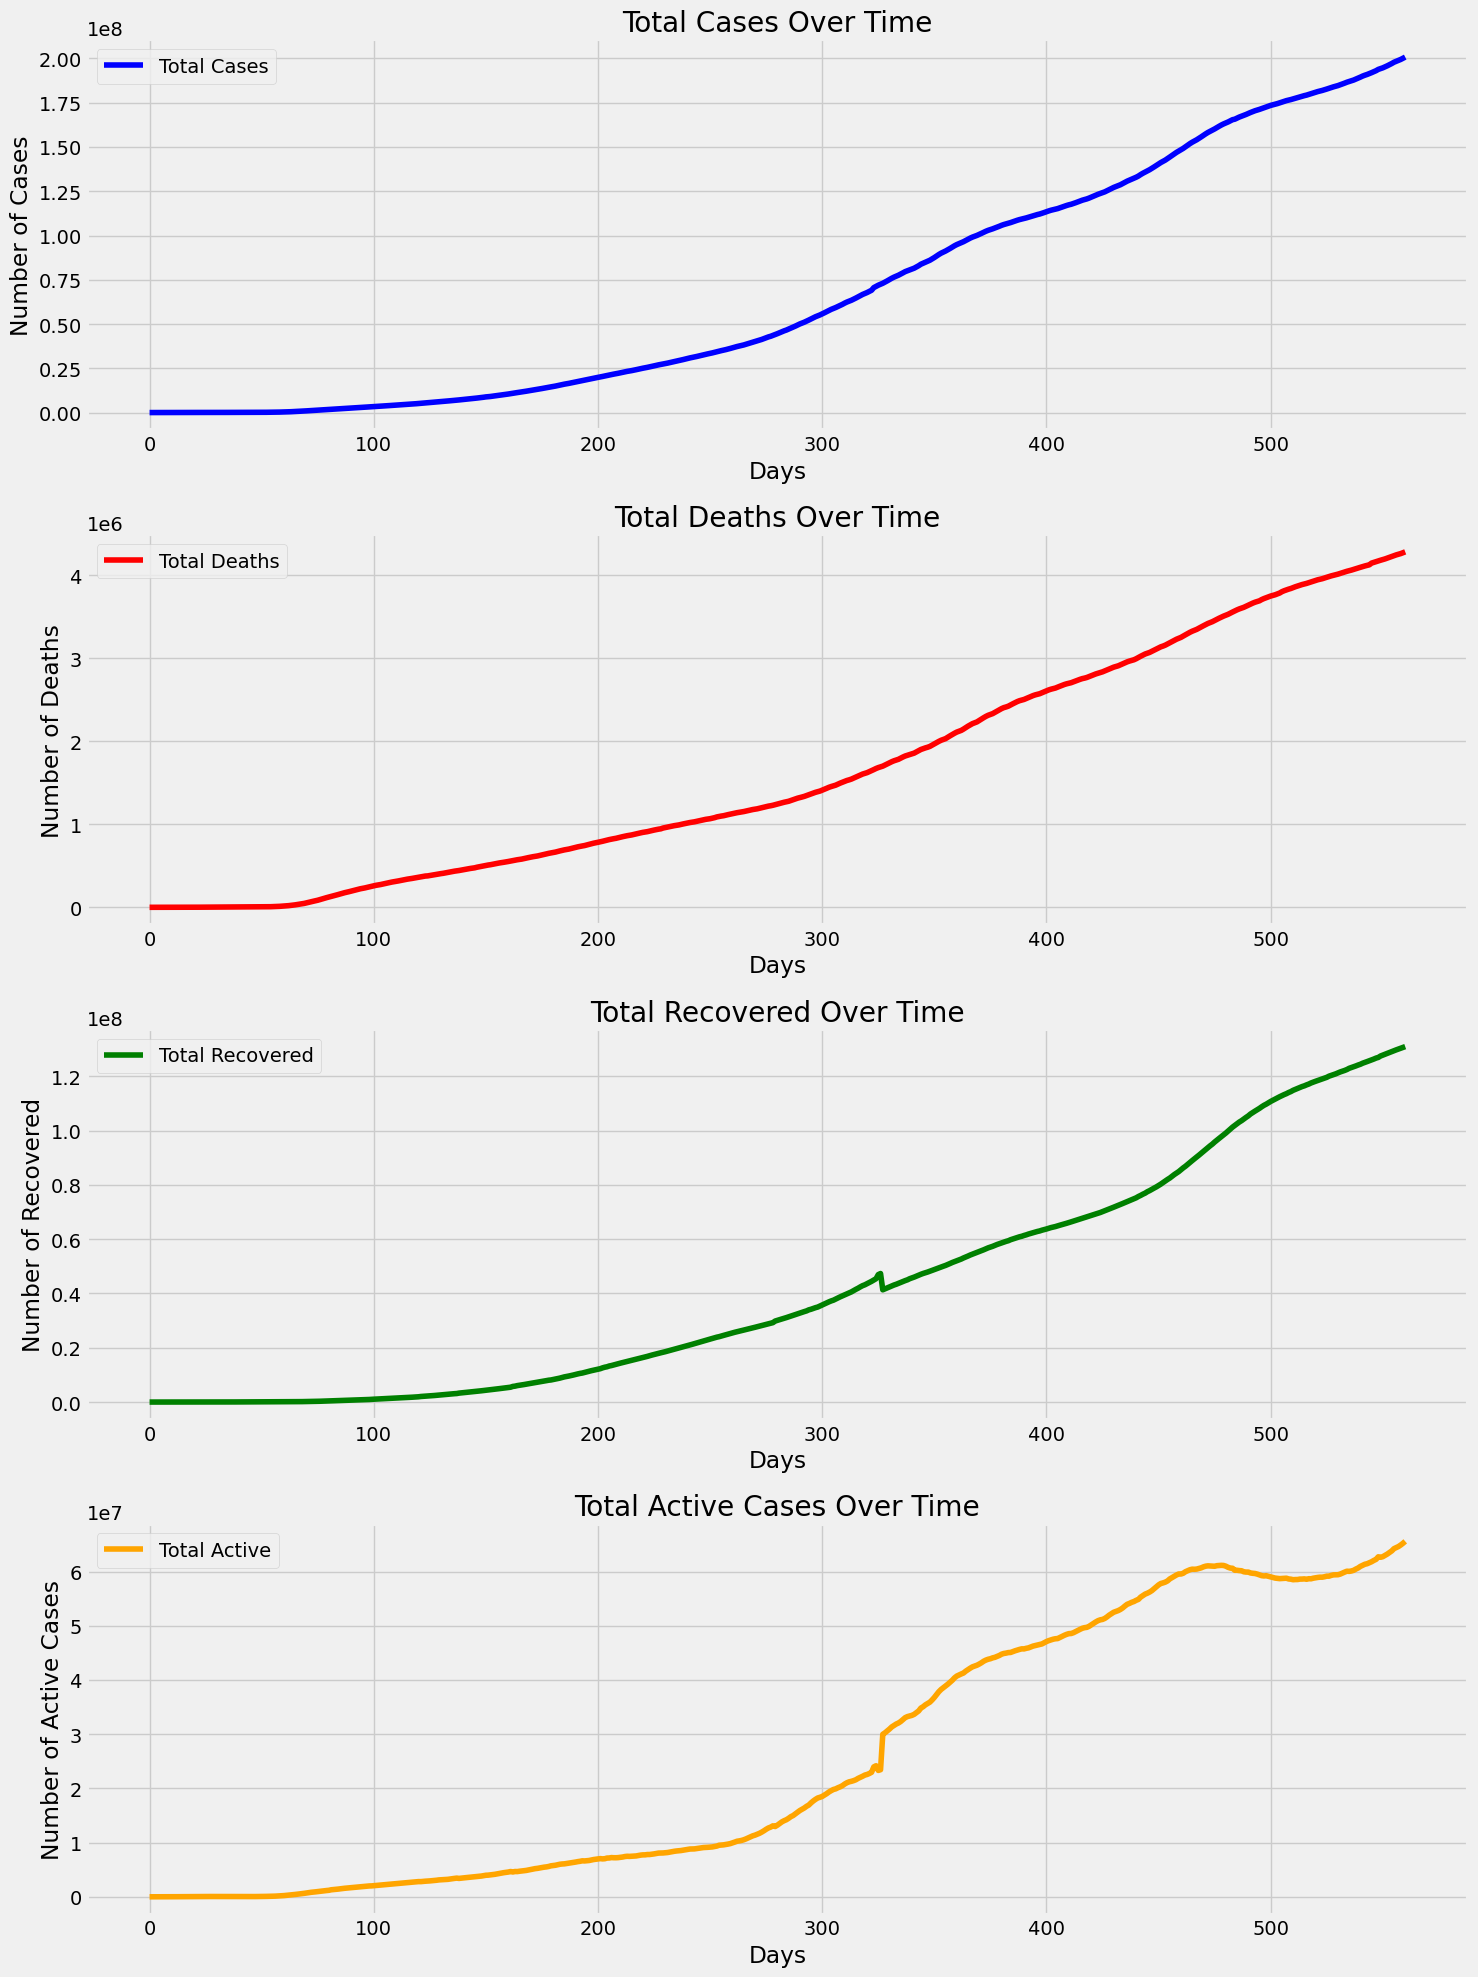

In [16]:
#create date range 
adjusted_dates = list(range(len(dates)))
#plot the chart 
fig, axs = plt.subplots(4, 1, figsize=(15, 20))
#plot1:  total 
axs[0].plot(adjusted_dates, total_cases, label='Total Cases', color='blue')
axs[0].set_title('Total Cases Over Time')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Number of Cases')
axs[0].legend()
axs[0].grid(True)
#plot2: total death cases
axs[1].plot(adjusted_dates, total_deaths, label='Total Deaths', color='red')
axs[1].set_title('Total Deaths Over Time')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Number of Deaths')
axs[1].legend()
axs[1].grid(True)
#plot3: total of recovery 
axs[2].plot(adjusted_dates, total_recovered, label='Total Recovered', color='green')
axs[2].set_title('Total Recovered Over Time')
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Number of Recovered')
axs[2].legend()
axs[2].grid(True)
#plot4: total of case that under treatment
axs[3].plot(adjusted_dates, total_active, label='Total Active', color='orange')
axs[3].set_title('Total Active Cases Over Time')
axs[3].set_xlabel('Days')
axs[3].set_ylabel('Number of Active Cases')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()



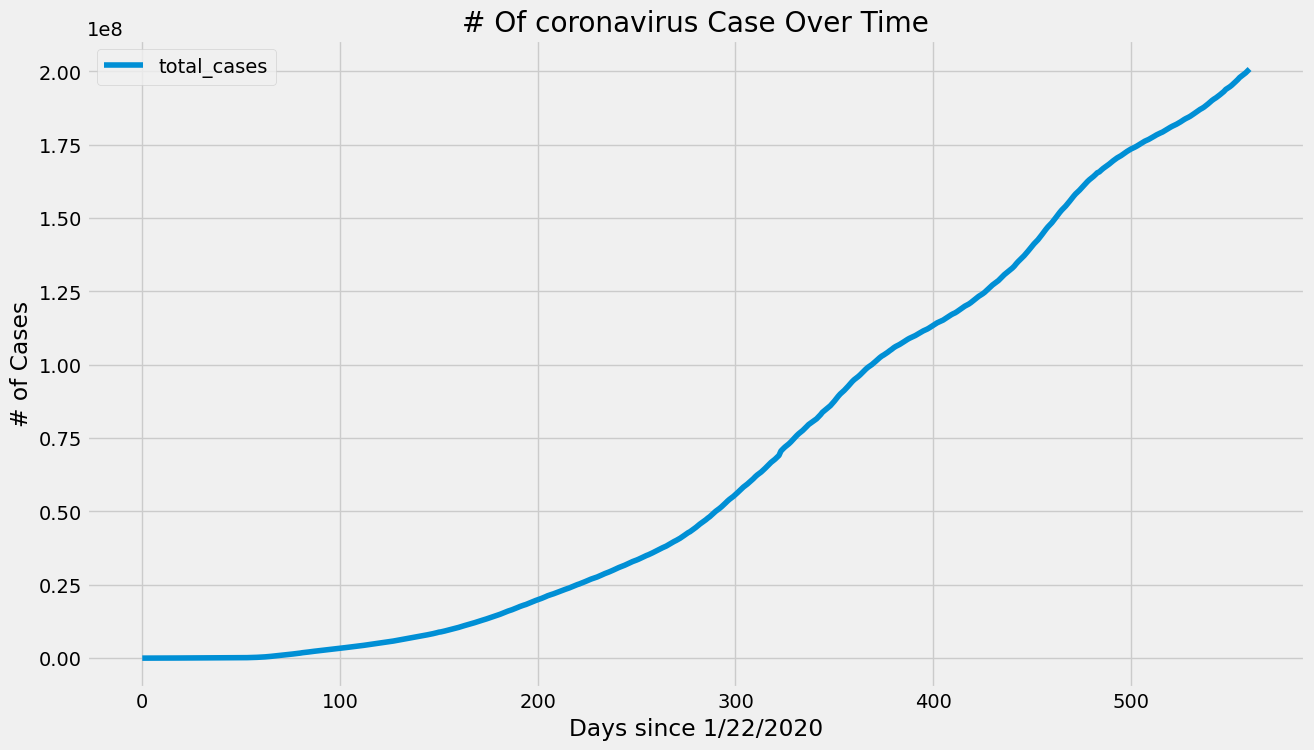

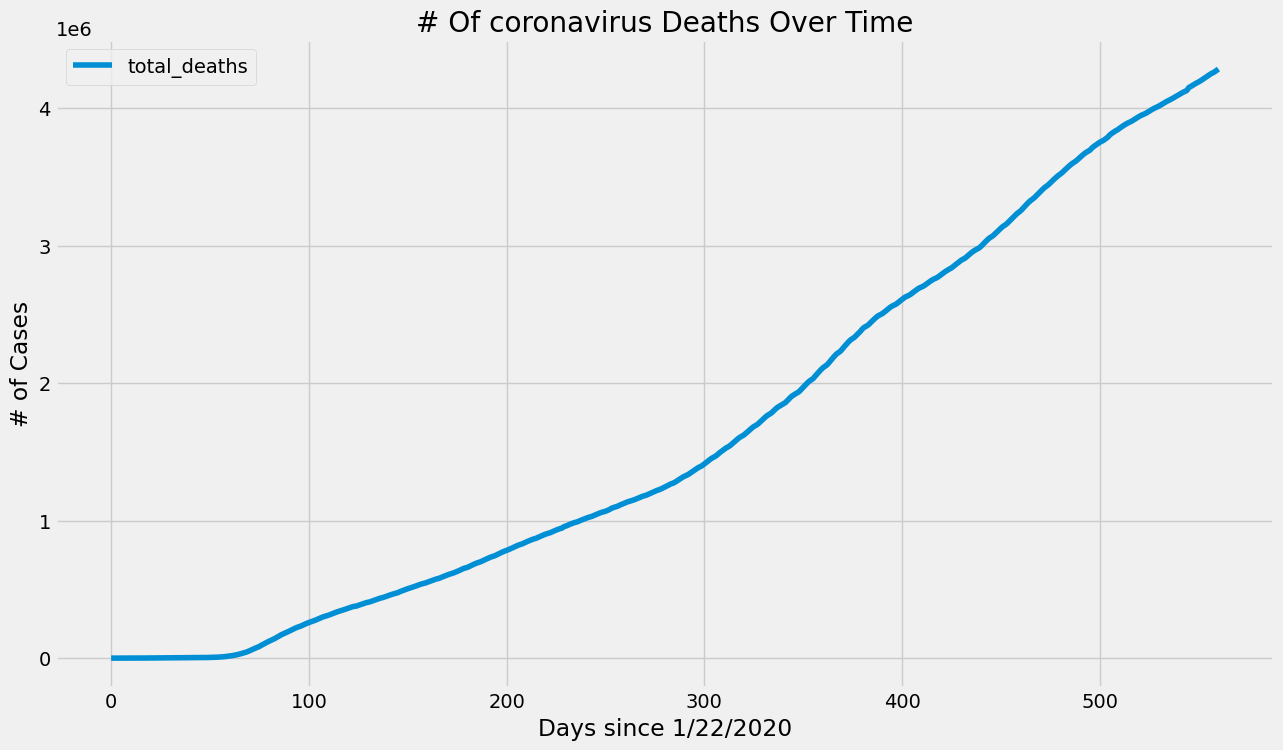

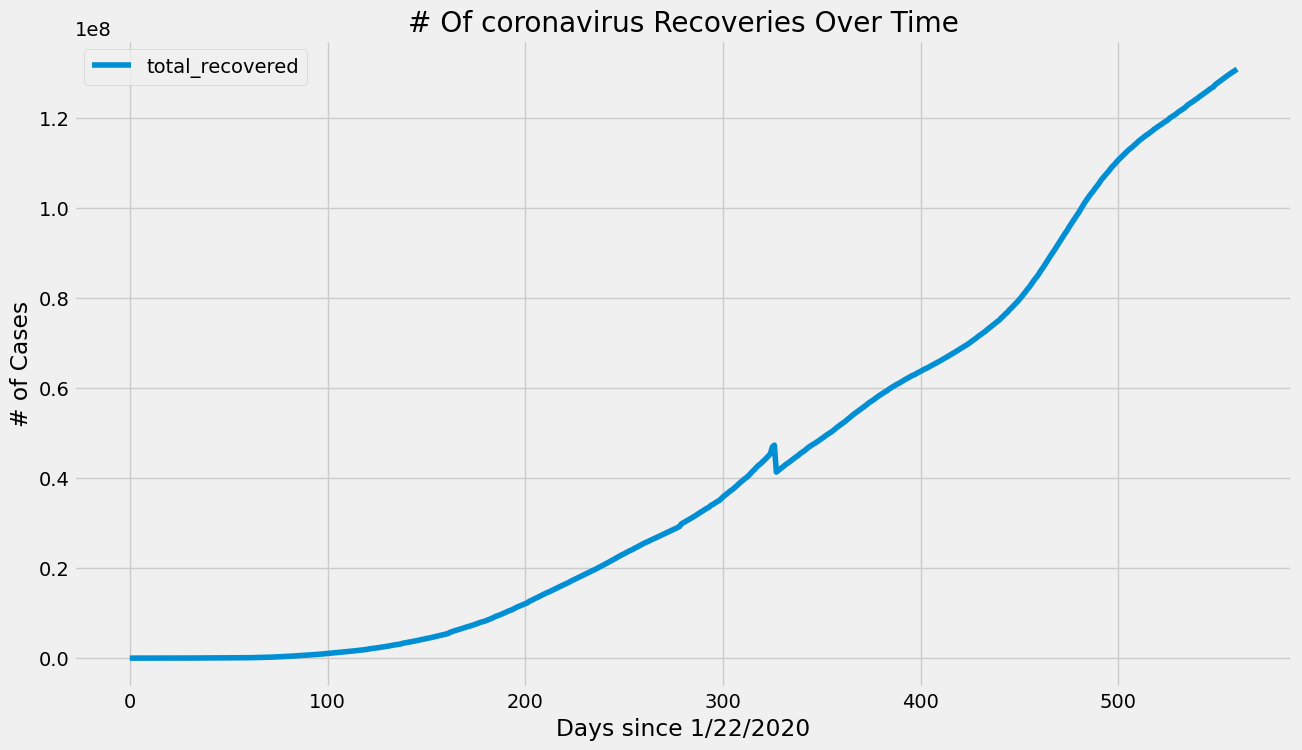

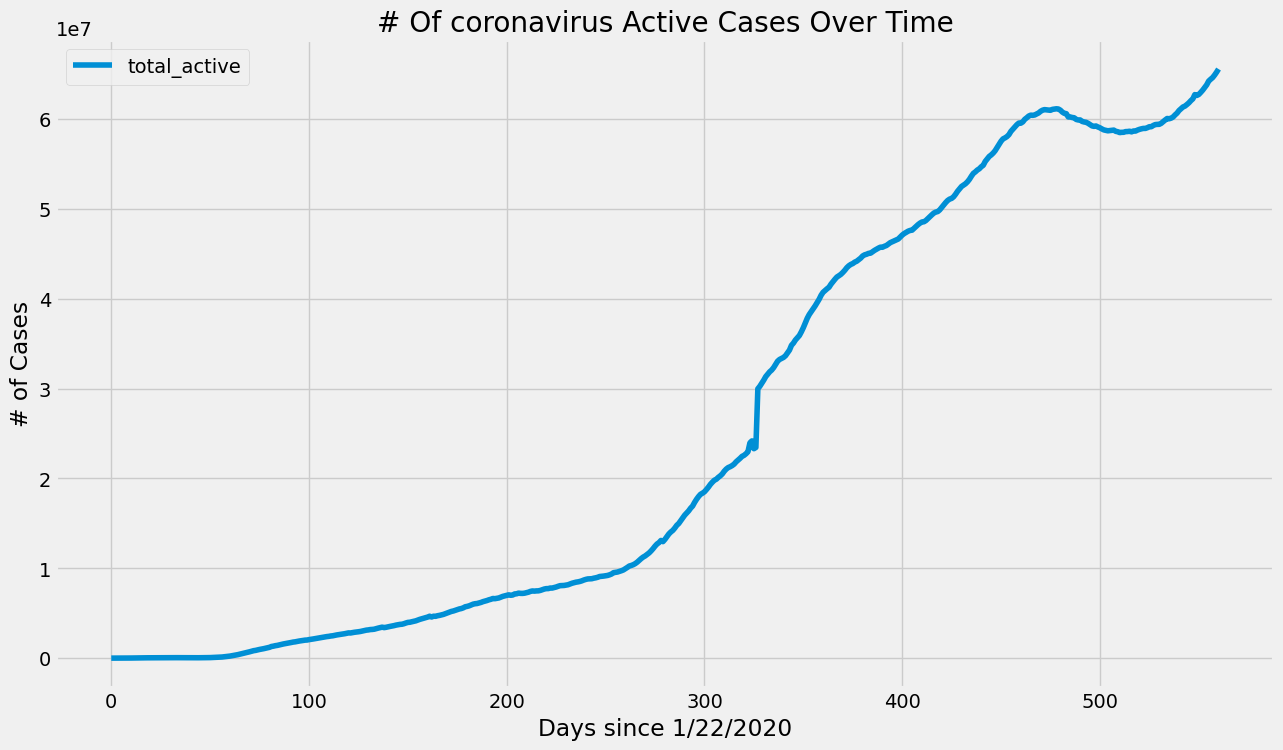

In [ ]:
#Nhập mã lập trình của bạn tại đây:


## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [18]:
#Nhập mã lập trình của bạn tại đây:

# Tính số lượng gia tăng hàng ngày
daily_new_cases = np.diff(total_cases, prepend=total_cases[0])
daily_new_deaths = np.diff(total_deaths, prepend=total_deaths[0])
daily_new_recovered = np.diff(total_recovered, prepend=total_recovered[0])
daily_new_active = np.diff(total_active, prepend=total_active[0])

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

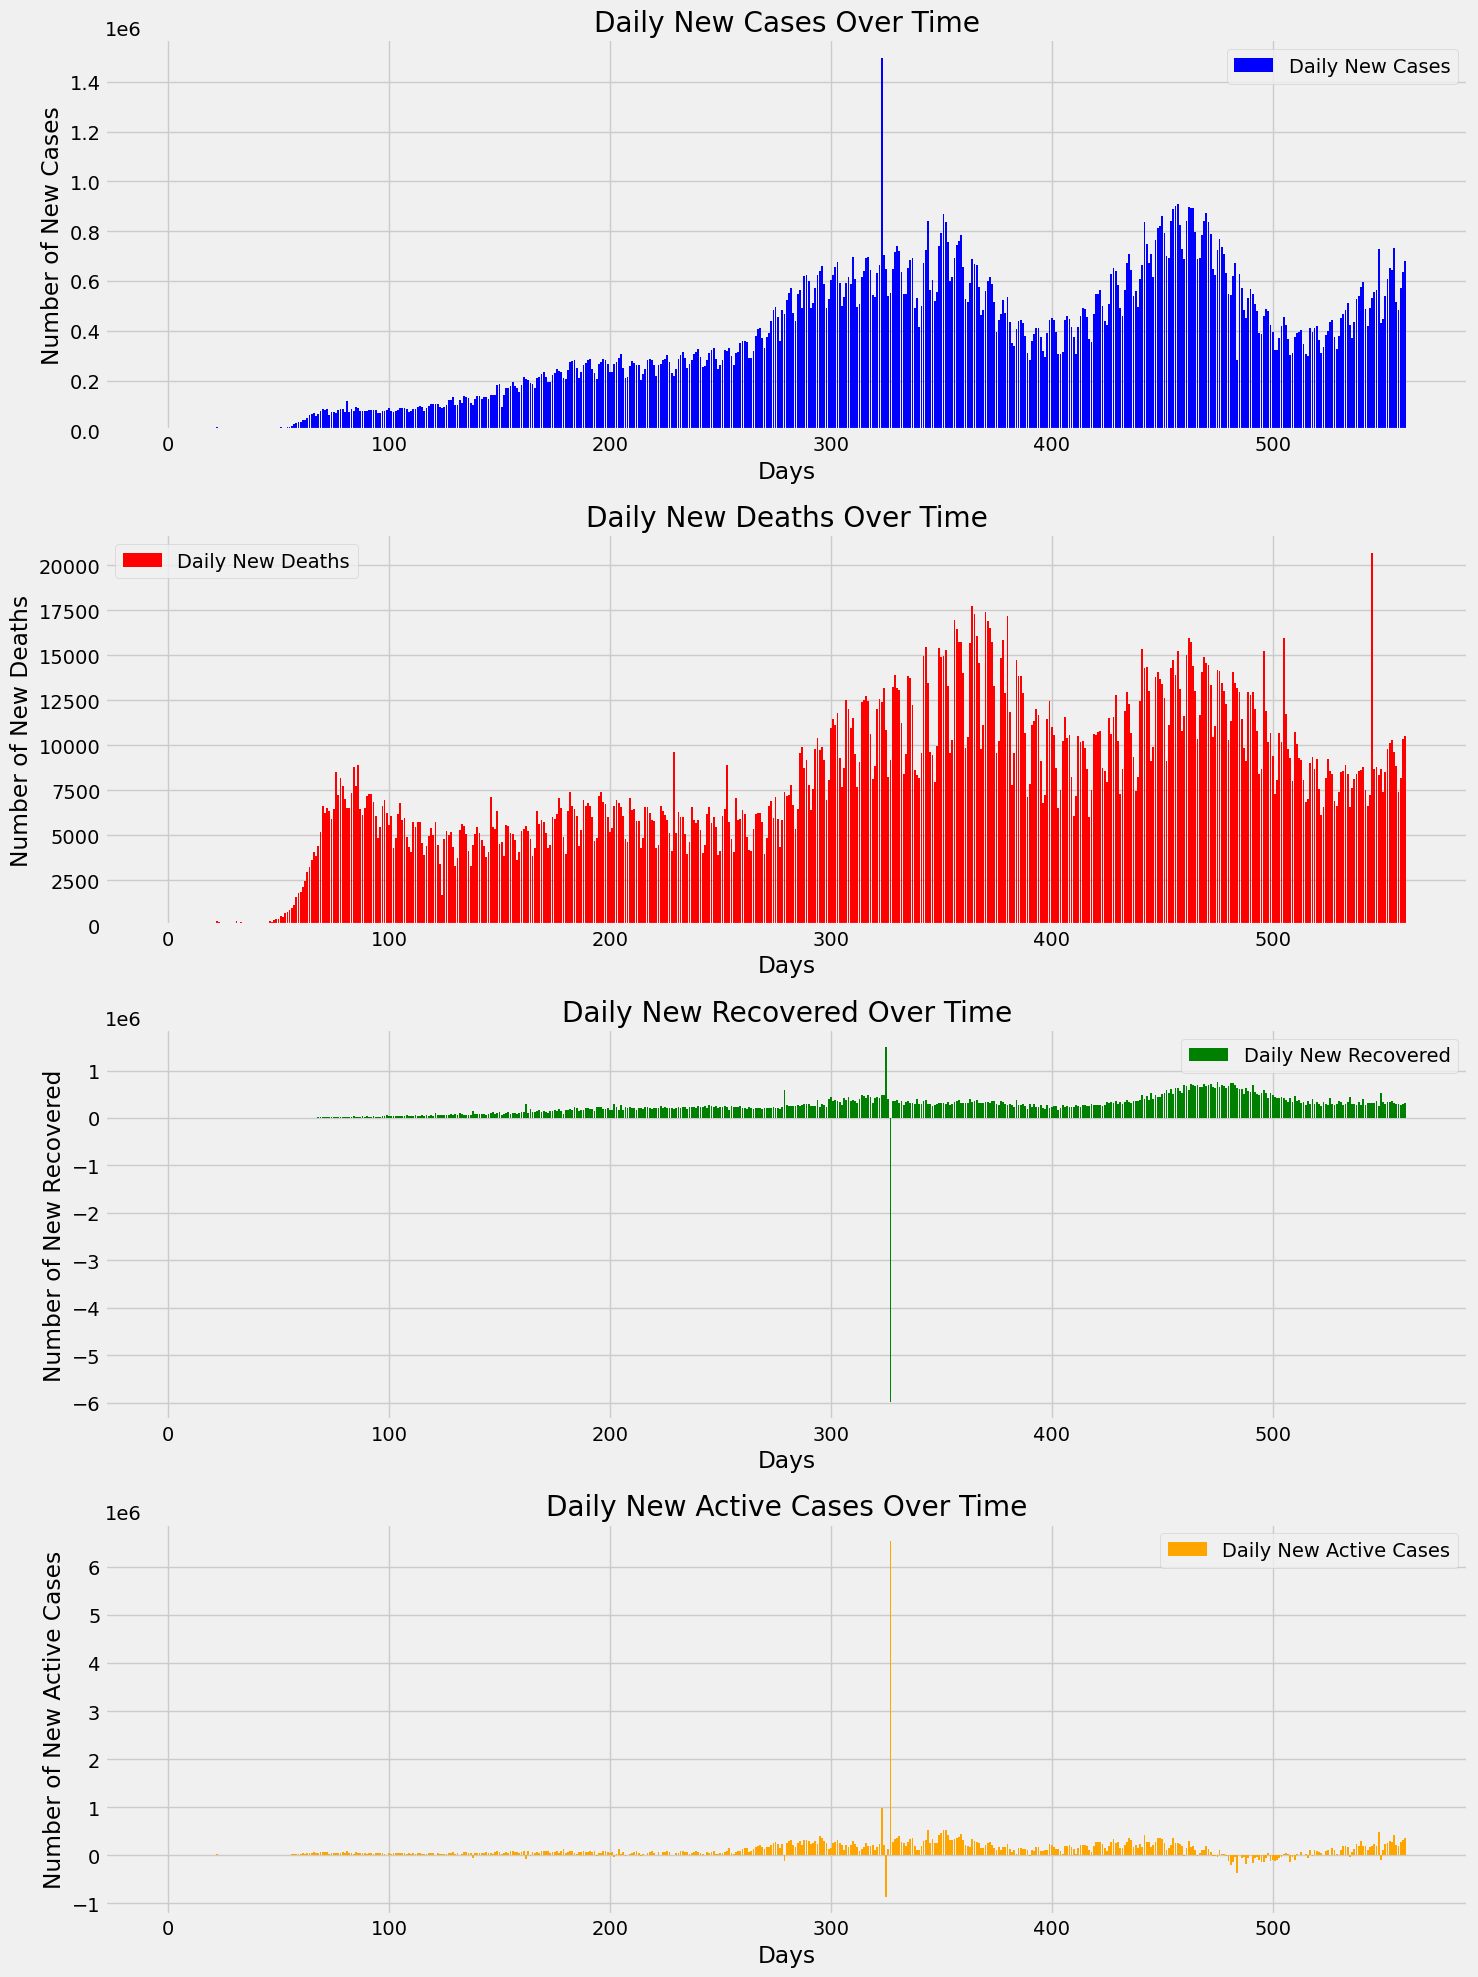

In [19]:
#Nhập mã lập trình của bạn tại đây:

# Vẽ biểu đồ gia tăng hàng ngày
fig, axs = plt.subplots(4, 1, figsize=(15, 20))
# Biểu đồ gia tăng hàng ngày tổng số ca bệnh
axs[0].bar(adjusted_dates, daily_new_cases, label='Daily New Cases', color='blue')
axs[0].set_title('Daily New Cases Over Time')
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Number of New Cases')
axs[0].legend()
axs[0].grid(True)

# Biểu đồ gia tăng hàng ngày tổng số người chết
axs[1].bar(adjusted_dates, daily_new_deaths, label='Daily New Deaths', color='red')
axs[1].set_title('Daily New Deaths Over Time')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Number of New Deaths')
axs[1].legend()
axs[1].grid(True)

# Biểu đồ gia tăng hàng ngày tổng số người phục hồi
axs[2].bar(adjusted_dates, daily_new_recovered, label='Daily New Recovered', color='green')
axs[2].set_title('Daily New Recovered Over Time')
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Number of New Recovered')
axs[2].legend()
axs[2].grid(True)

# Biểu đồ gia tăng hàng ngày tổng số người đang điều trị
axs[3].bar(adjusted_dates, daily_new_active, label='Daily New Active Cases', color='orange')
axs[3].set_title('Daily New Active Cases Over Time')
axs[3].set_xlabel('Days')
axs[3].set_ylabel('Number of New Active Cases')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [22]:
#Nhập mã lập trình của bạn tại đây:
# Tính tỷ lệ tử vong và tỷ lệ hồi phục
mortality_rate = [(d / c) * 100 if c != 0 else 0 for d, c in zip(total_deaths, total_cases)]
#recovery_rate = [(r / c) * 100 if c != 0 else 0 for r, c in zip(total_recovered, total_cases)]
average_mortality_rate = np.mean(mortality_rate)

# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

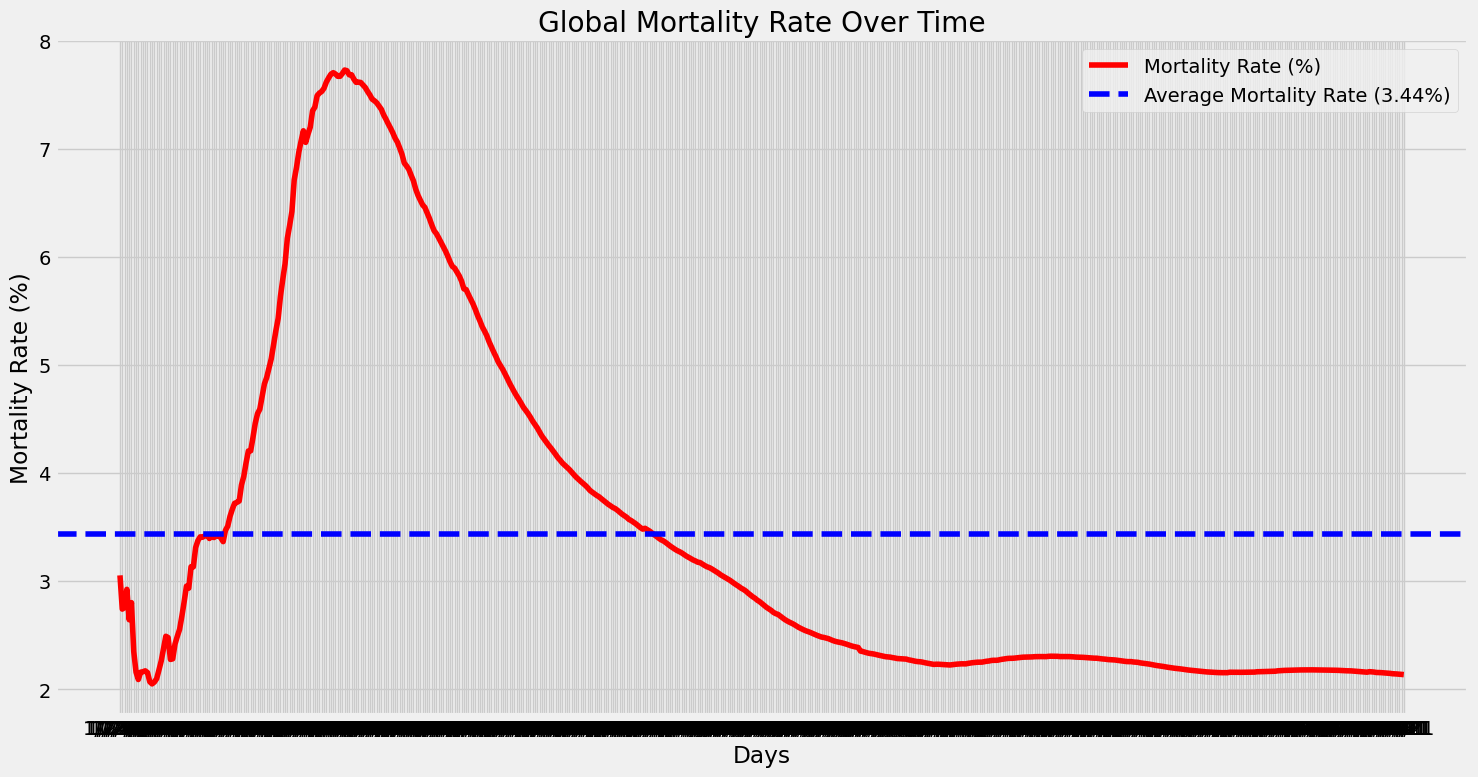

In [23]:
#Nhập mã lập trình của bạn tại đây:
#Vẽ biểu đồ tỷ lệ tử vong theo thời gian
plt.figure(figsize=(15, 8))
plt.plot(dates, mortality_rate, label='Mortality Rate (%)', color='red')
plt.axhline(y=average_mortality_rate, color='blue', linestyle='--', label=f'Average Mortality Rate ({average_mortality_rate:.2f}%)')
plt.title('Global Mortality Rate Over Time')
plt.xlabel('Days')
plt.ylabel('Mortality Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**7.2**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

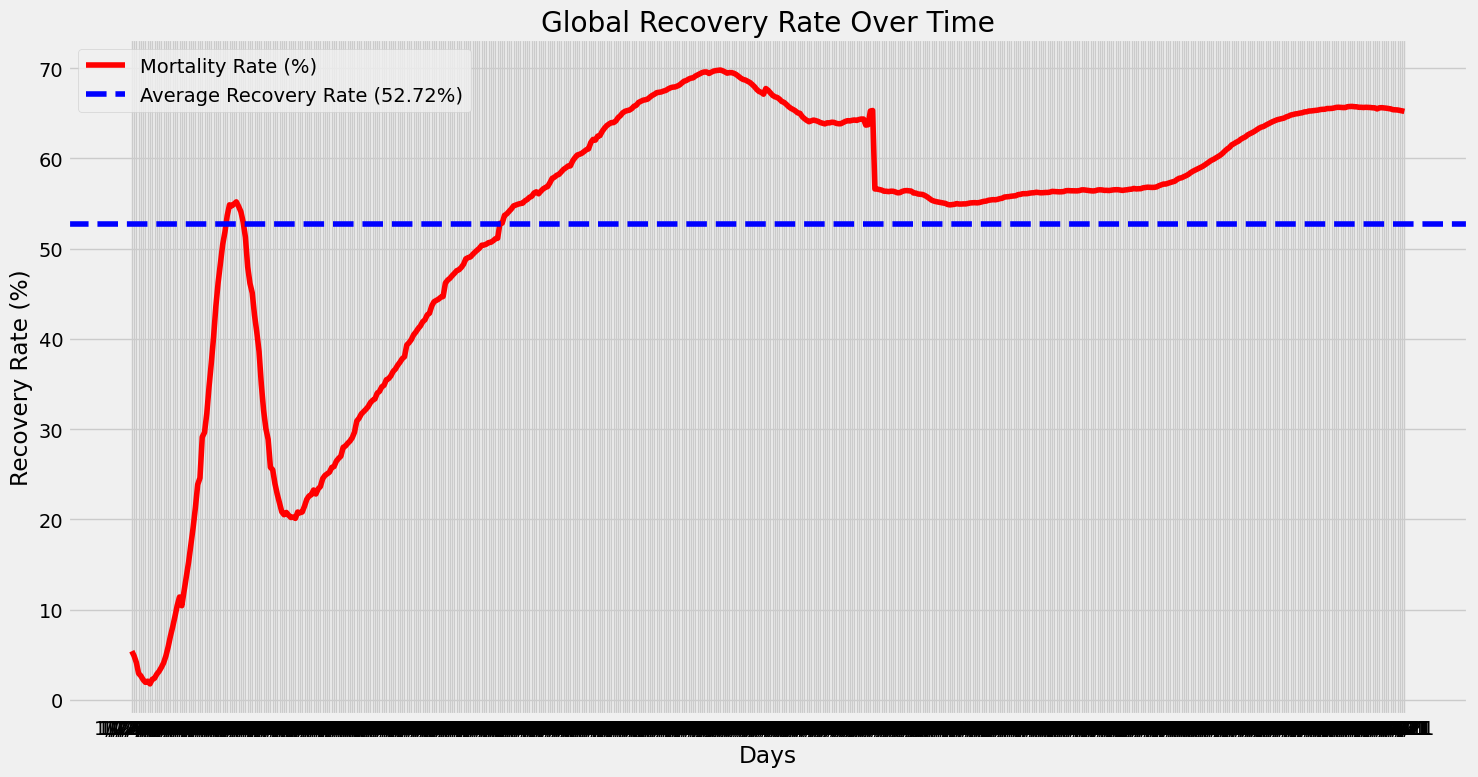

In [24]:
#Nhập mã lập trình của bạn tại đây:
recovery_rate = [(r / c) * 100 if c != 0 else 0 for r, c in zip(total_recovered, total_cases)]
average_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(15, 8))
plt.plot(dates, recovery_rate, label='Mortality Rate (%)', color='red')
plt.axhline(y=average_recovery_rate, color='blue', linestyle='--', label=f'Average Recovery Rate ({average_recovery_rate:.2f}%)')
plt.title('Global Recovery Rate Over Time')
plt.xlabel('Days')
plt.ylabel('Recovery Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [25]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [37]:
#Nhập mã lập trình của bạn tại đây:
confirmed_df['continent'] = confirmed_df['Country/Region'].apply(country_to_continent_code)
deaths_df['continent'] = deaths_df['Country/Region'].apply(country_to_continent_code)
recoveries_df['continent'] = recoveries_df['Country/Region'].apply(country_to_continent_code)
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,continent
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,145008,145552,145996,146523,147154,147501,147985,148572,148933,AS
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132922,132952,132999,133036,133081,133121,133146,133211,133310,EU
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,165204,167131,168668,170189,171392,172564,173922,175229,176724,AF
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14586,14586,14655,14678,14678,14678,14747,14766,14797,EU
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,42110,42288,42486,42646,42777,42815,42970,43070,43158,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,316189,316328,316487,316603,316738,316861,317083,317264,317404,na
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,na
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7022,7027,7042,7058,7061,7070,7081,7086,7096,AS
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,192956,193432,194140,195096,195816,196293,196490,197123,197791,AF


# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [47]:
#Nhập mã lập trình của bạn tại đây:
country_df = pd.DataFrame({
    'continent': continents,
    'Confirmed': Total_confirmed,
    'Deaths': total_deaths,
    'Recoveries': recoveries_df,
    'Active': total_active,
    'Mortality Rate': mortality_rate
})
country_df

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [31]:
#Nhập mã lập trình của bạn tại đây:
continental_df = pd.DataFrame({
    'Confirmed': confirmed_df,
    'Deaths': deaths_df,
    'Recoveries': recoveries_df,
    'Active': total_active,
    'Mortality Rate': mortality_rate
})
continental_df

ValueError: 2

## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [48]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

ValueError: could not convert string to float: 'EUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEU'

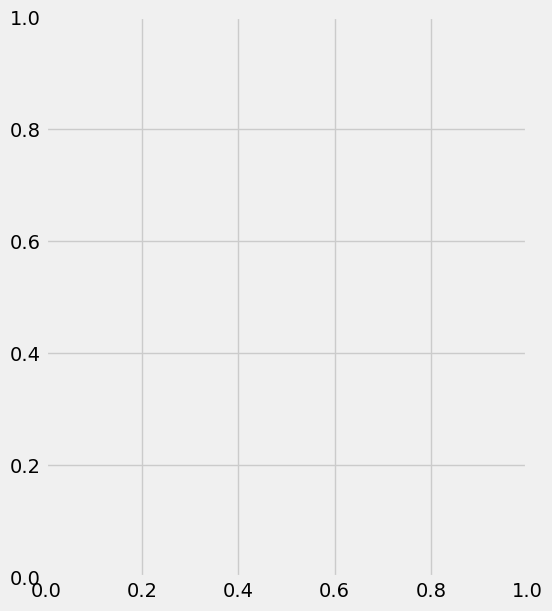

In [49]:
#Nhập mã lập trình của bạn tại đây:
# Tổng hợp số ca dương tính theo từng lục địa
continent_confirmed_totals = confirmed_df.groupby('continent').sum().iloc[:, 5:].sum(axis=1)

# Sắp xếp lục địa theo số ca dương tính giảm dần
sorted_continents = continent_confirmed_totals.sort_values(ascending=False).index.tolist()

# Hiển thị biểu đồ cho từng lục địa
fig = plt.figure(figsize=(15, 30))
for i, continent in enumerate(sorted_continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent=continent, figure=[fig, 4, 2, i + 1], scale='linear')
plt.tight_layout()
plt.show()


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [ ]:
#Nhập mã lập trình của bạn tại đây:

# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

<Axes: >

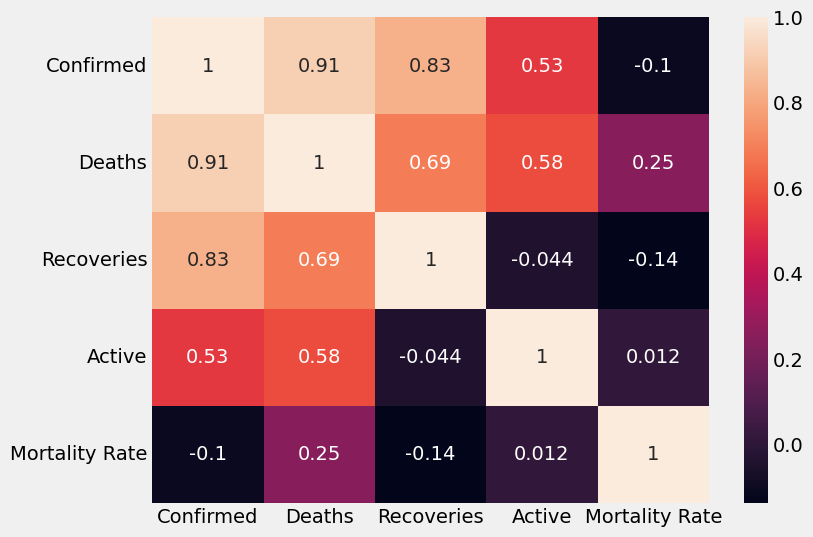

In [ ]:
#Nhập mã lập trình của bạn tại đây:

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

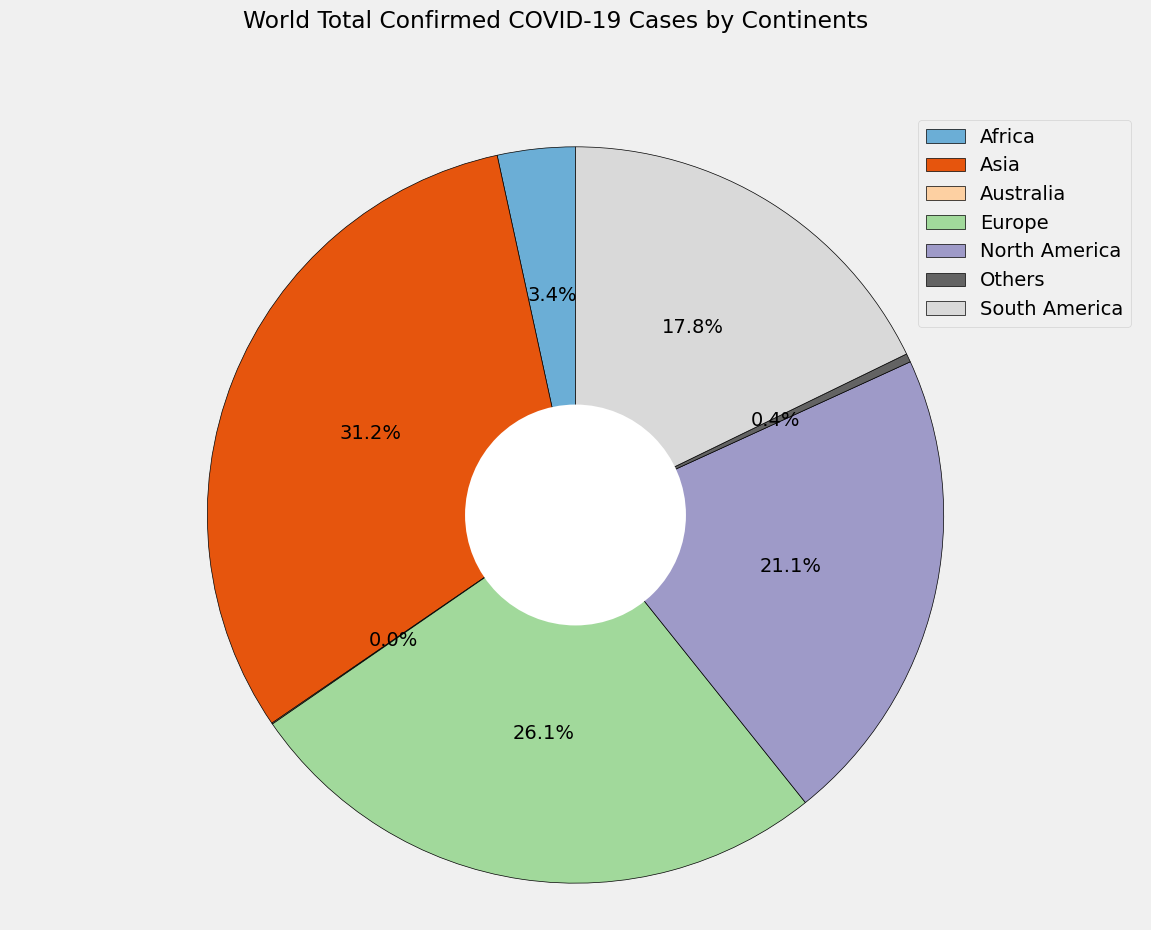

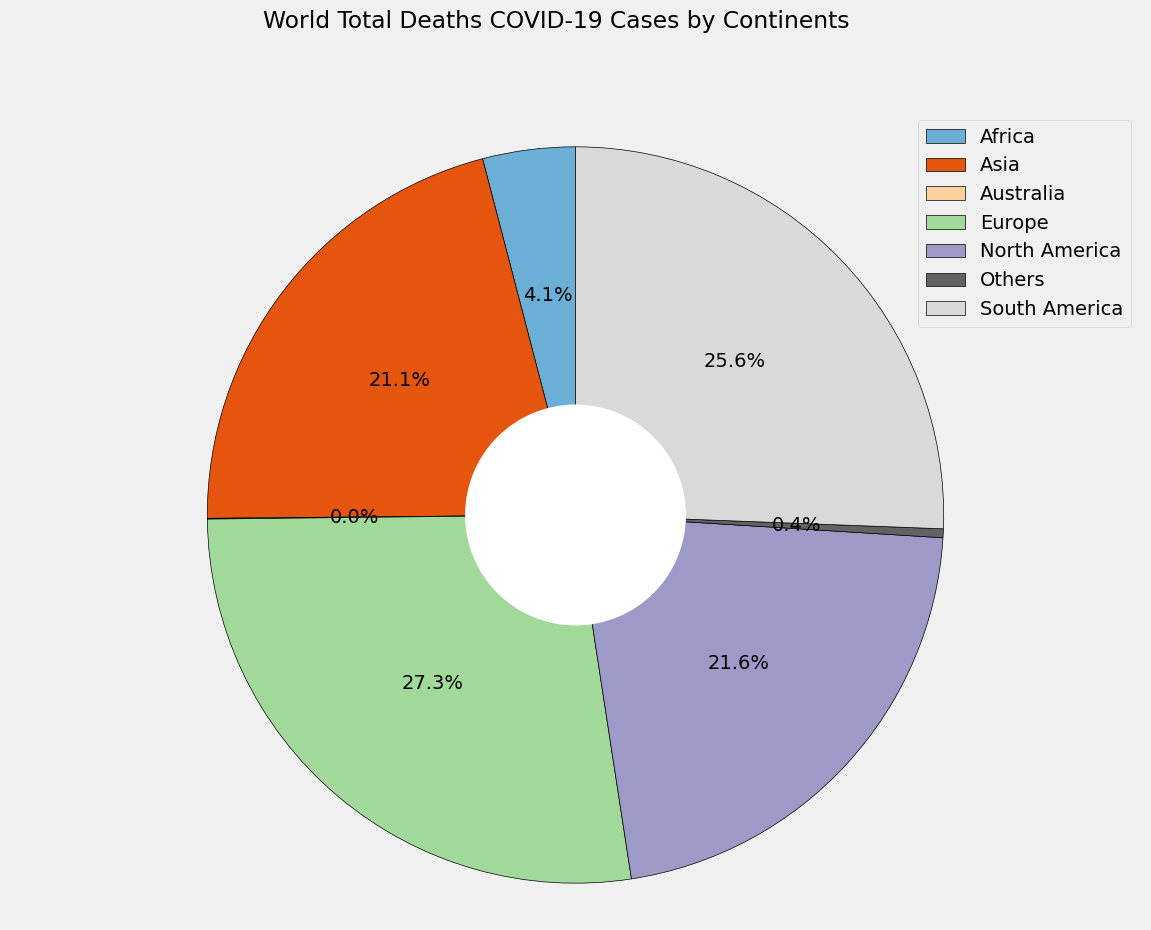

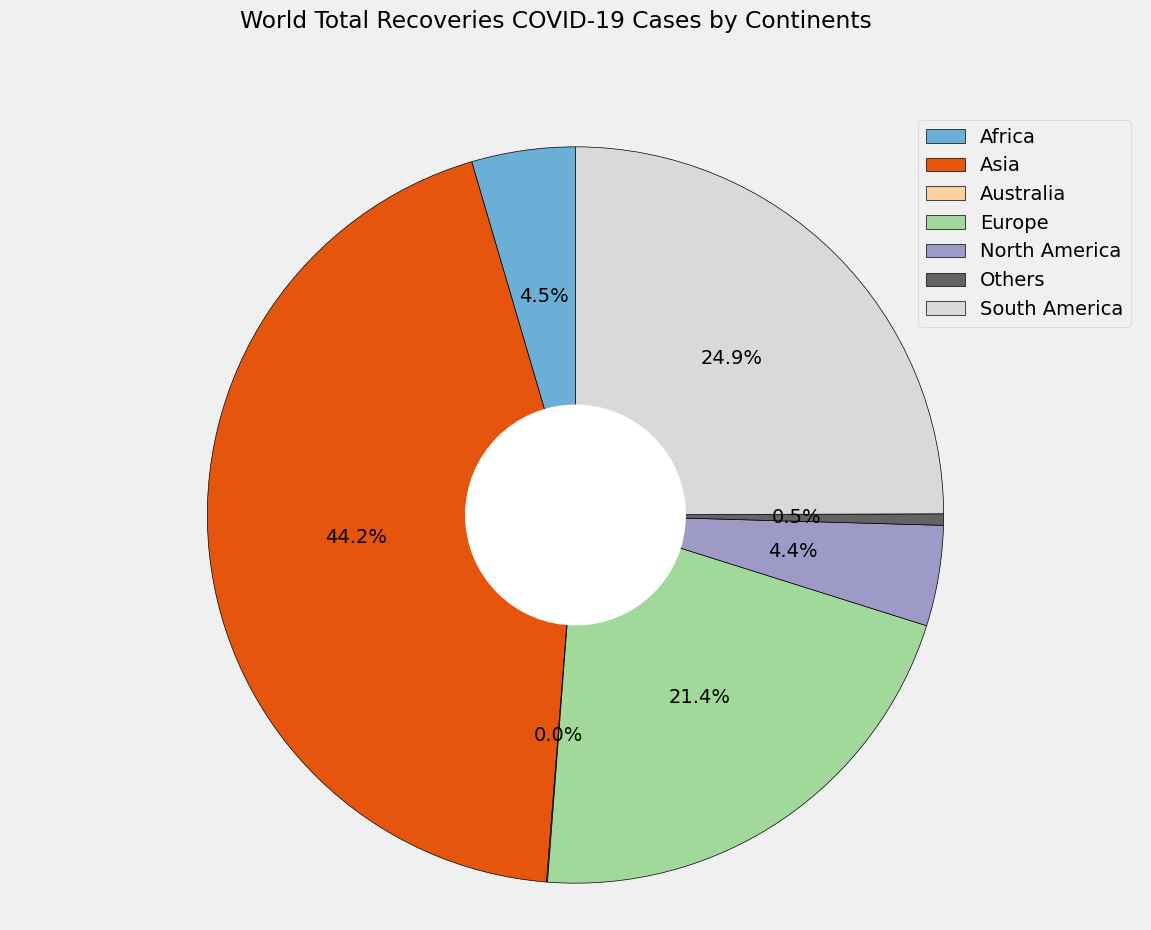

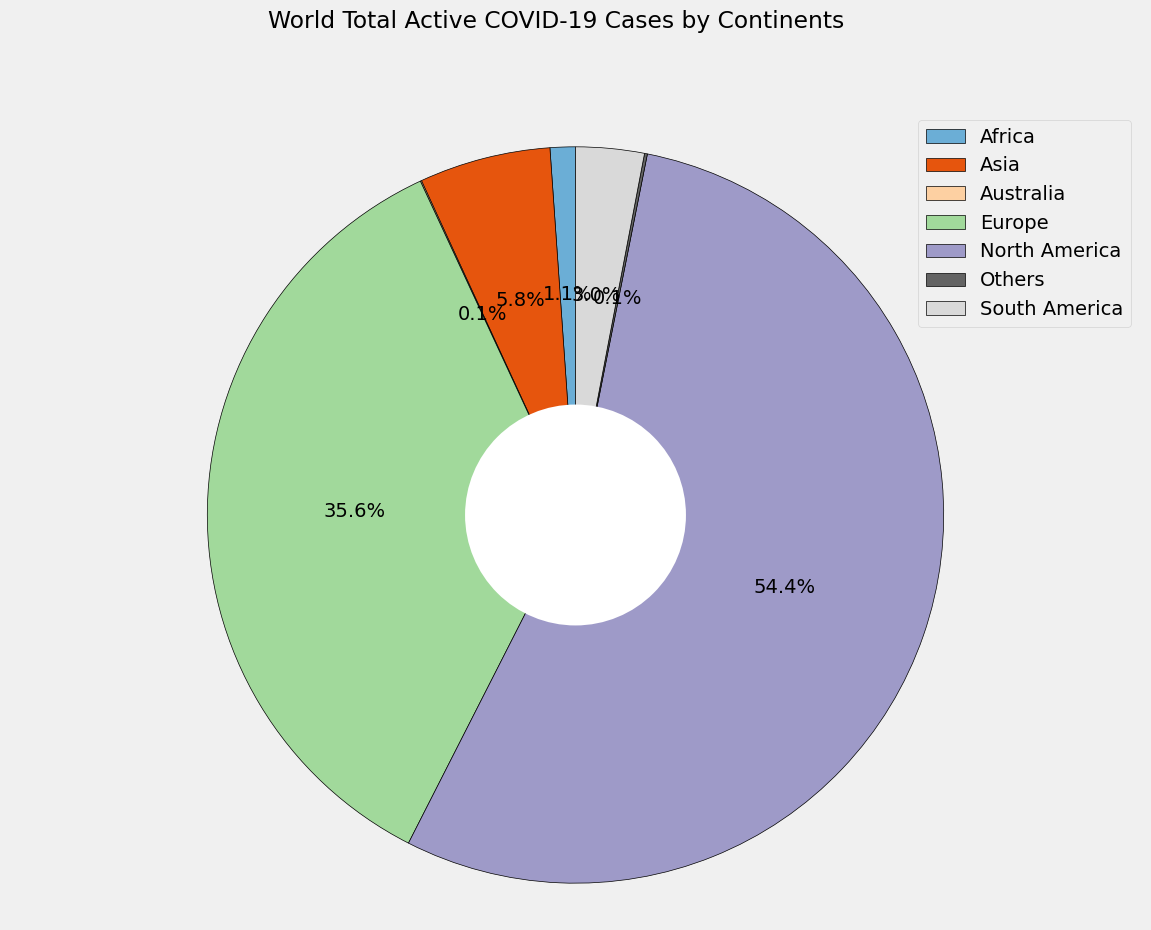

In [ ]:
#Nhập mã lập trình của bạn tại đây:


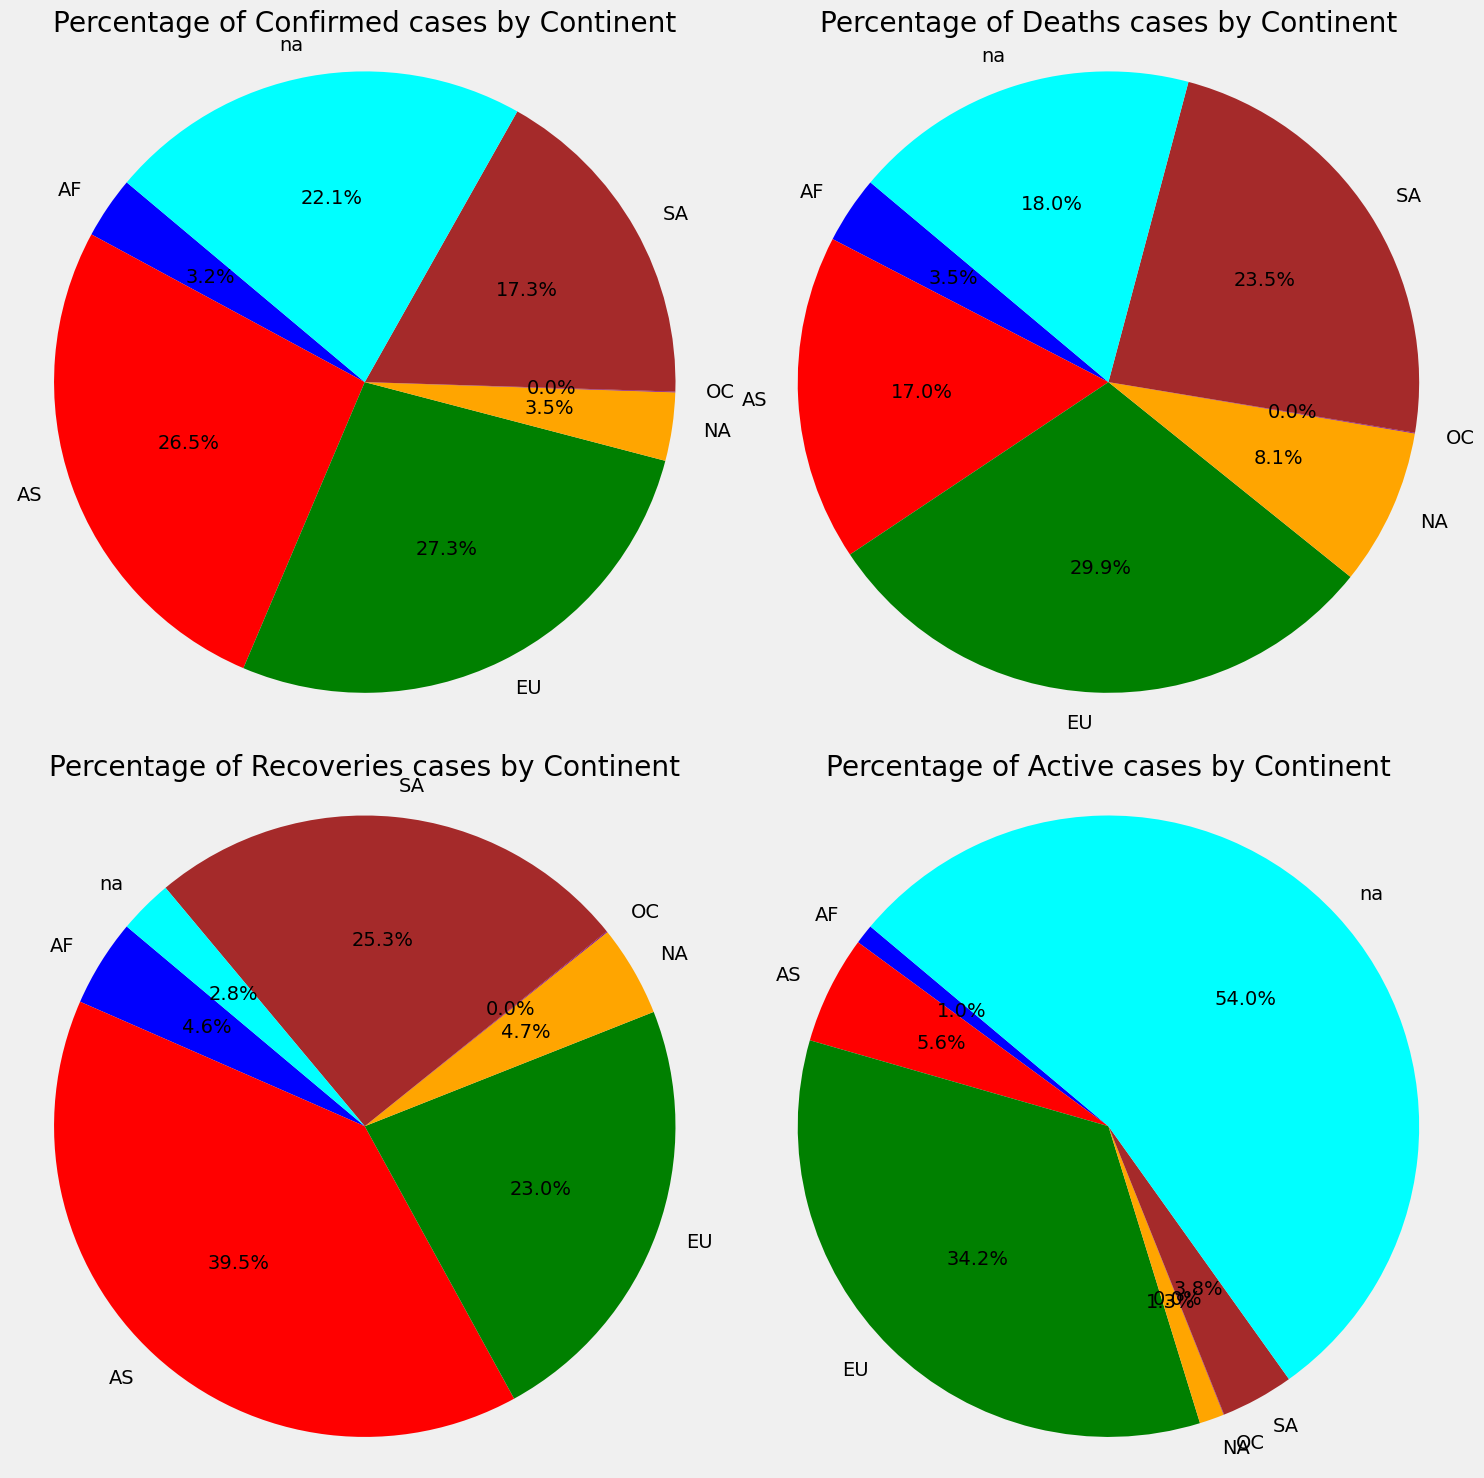

In [50]:
#Nhập mã lập trình của bạn tại đây:

# Tính tổng số ca dương tính, tử vong, hồi phục và đang điều trị cho từng lục địa
continent_confirmed = confirmed_df.groupby('continent').sum().iloc[:, 5:].sum(axis=1)
continent_deaths = deaths_df.groupby('continent').sum().iloc[:, 5:].sum(axis=1)
continent_recoveries = recoveries_df.groupby('continent').sum().iloc[:, 5:].sum(axis=1)
continent_active = continent_confirmed - continent_deaths - continent_recoveries

# Tạo DataFrame cho các giá trị này
continent_stats = pd.DataFrame({
    'Confirmed': continent_confirmed,
    'Deaths': continent_deaths,
    'Recoveries': continent_recoveries,
    'Active': continent_active
})

# Danh sách các trường và màu sắc
fields = ['Confirmed', 'Deaths', 'Recoveries', 'Active']
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'cyan']
continents = continent_stats.index

# Tạo biểu đồ hình tròn
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, field in enumerate(fields):
    sizes = continent_stats[field]
    axes[i].pie(sizes, labels=continents, colors=colors, autopct='%1.1f%%', startangle=140)
    axes[i].axis('equal')  # Đảm bảo hình tròn
    axes[i].set_title(f'Percentage of {field} cases by Continent')

plt.tight_layout()
plt.show()

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [52]:
#Nhập mã lập trình của bạn tại đây:
!pip install folium pandas


# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [ ]:
#Nhập mã lập trình của bạn tại đây:

errot: Korea, North
errot: Summer Olympics 2020
errot: Winter Olympics 2022


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log10



# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [ ]:
#Nhập mã lập trình của bạn tại đây:

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
USA,North America,35460776,611222,0,34849554,1.72,40.000000,-100.000000
India,Asia,31812114,426290,30974748,411076,1.34,20.593684,78.962880
Brazil,South America,20034407,559944,17771228,1703235,2.79,-14.235000,-51.925300
Russia,Europe,6274006,159032,5609682,505292,2.53,61.524010,105.318756
France,Europe,6272466,112245,415111,5745110,1.79,6.425300,-9.839634
United Kingdom,Europe,5980830,157209,24693,5798928,2.63,22.424560,-42.022004
Turkey,Asia,5822487,51767,5478185,292535,0.89,38.963700,35.243300
Argentina,South America,4975616,106747,4615834,253035,2.15,-38.416100,-63.616700
Colombia,South America,4815063,121695,4615354,78014,2.53,4.570900,-74.297300


# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

In [ ]:
#Nhập mã lập trình của bạn tại đây:


# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

# Bài toán 21
**Tập dữ liệu USA**

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [ ]:
#Nhập mã lập trình của bạn tại đây:

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

In [ ]:
#Nhập mã lập trình của bạn tại đây: